In [1]:
# APPLING ARIMA MODEL :

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

In [2]:
# Load data
data = pd.read_csv('STOCK DETAILS.csv')
company_name = 'AAPL' 
data_company = data[data['Company'] == 'AAPL'].copy()


In [3]:
import pandas as pd

# Read the CSV 
data = pd.read_csv("STOCK DETAILS.csv")

# Check the type of the Date column
print(data['Date'].dtype)  

# Force it to be datetime
data['Date'] = pd.to_datetime(data['Date'], errors='coerce', utc=True)

# Remove timezone information 
data['Date'] = data['Date'].dt.tz_convert(None)

# Set as index
data.set_index('Date', inplace=True)
data.sort_index(inplace=True)

print(data.head())
print(data.index.dtype) 

object
                           Open        High         Low       Close  \
Date                                                                  
2018-11-29 05:00:00   43.829761   43.863354   42.639594   43.083508   
2018-11-29 05:00:00  104.769074  105.519257  103.534595  104.636131   
2018-11-29 05:00:00   54.176498   55.007500   54.099998   54.729000   
2018-11-29 05:00:00   83.749496   84.499496   82.616501   83.678497   
2018-11-29 05:00:00   39.692784   40.064904   38.735195   39.037853   

                        Volume  Dividends  Stock Splits Company  
Date                                                             
2018-11-29 05:00:00  167080000       0.00           0.0    AAPL  
2018-11-29 05:00:00   28123200       0.00           0.0    MSFT  
2018-11-29 05:00:00   31004000       0.00           0.0   GOOGL  
2018-11-29 05:00:00  132264000       0.00           0.0    AMZN  
2018-11-29 05:00:00   54917200       0.04           0.0    NVDA  
datetime64[ns]


In [4]:
# Remove duplicate dates
data = data[~data.index.duplicated(keep='first')]


In [5]:
# Create complete business day index
full_idx = pd.date_range(start=data.index.min(), end=data.index.max(), freq='B')

In [6]:
# Reindex data to this complete business day index (missing dates get NaN)
data = data.reindex(full_idx)

In [7]:
# Fill missing Close values by forward filling
data['Close'] = data['Close'].ffill()

In [8]:
# Now ts has a proper business day index with freq set
ts = data['Close']

In [9]:
print(f"Time series freq: {ts.index.freq}")

Time series freq: <BusinessDay>


In [10]:
# Fit ARIMA model
model = ARIMA(ts, order=(0,1,1))
model_fit = model.fit()

# Forecast next 30 business days
arima_forecast = model_fit.forecast(steps=30)

# Create forecast index
last_date = ts.index[-1]
arima_forecast_index = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=30, freq='B')
arima_forecast_df = pd.DataFrame({'arima_Forecast':arima_forecast.values}, index=arima_forecast_index)


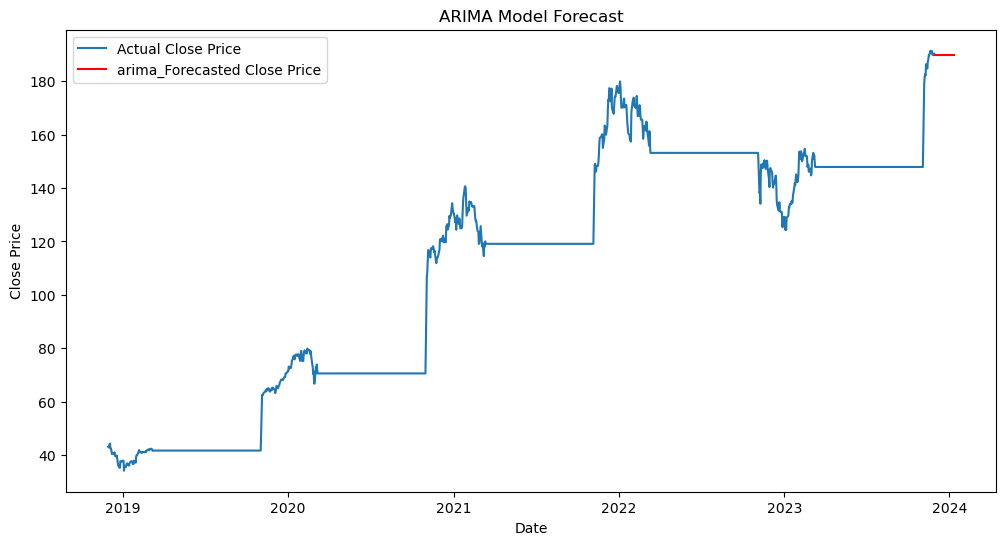

In [11]:
# Plot
plt.figure(figsize=(12,6))
plt.plot(ts, label='Actual Close Price')
plt.plot(arima_forecast_df, label='arima_Forecasted Close Price', color='red')
plt.title('ARIMA Model Forecast')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.savefig("ARIMA IMG1.png")
plt.show()


In [12]:
# APPLING SARIMA MODEL :

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load data
data = pd.read_csv('STOCK DETAILS.csv')
company_name = 'AAPL'  
data_company = data[data['Company'] == 'AAPL'].copy()

# Convert 'Date' to datetime without timezone
data['Date'] = pd.to_datetime(data['Date'], utc=True).dt.tz_convert(None)

# Set date as index and sort
data.set_index('Date', inplace=True)
data = data.sort_index()

# Remove duplicate dates
data = data[~data.index.duplicated(keep='first')]

# Create complete business day index
full_idx = pd.date_range(start=data.index.min(), end=data.index.max(), freq='B')

# Reindex data to full business day range
data = data.reindex(full_idx)

# Forward fill missing Close values
data['Close'] = data['Close'].ffill()

# Extract the Close price series
sarima_ts = data['Close']

print(f"Time series freq: {sarima_ts.index.freq}")


Time series freq: <BusinessDay>


In [13]:
# Fit SARIMA model: 

sarima_model = SARIMAX(ts,order=(0,1,0), seasonal_order=(0,0,0,5), enforce_stationarity=False, enforce_invertibility=False)
sarima_model_fit = sarima_model.fit(disp=False)

# Forecast next 30 business days
sarima_forecast = sarima_model_fit.forecast(steps=30)

# Prepare forecast index
last_date = ts.index[-1]
sarima_forecast_index = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=30, freq='B')

sarima_forecast_df = pd.DataFrame({'sarima_Forecast':sarima_forecast.values}, index=sarima_forecast_index)

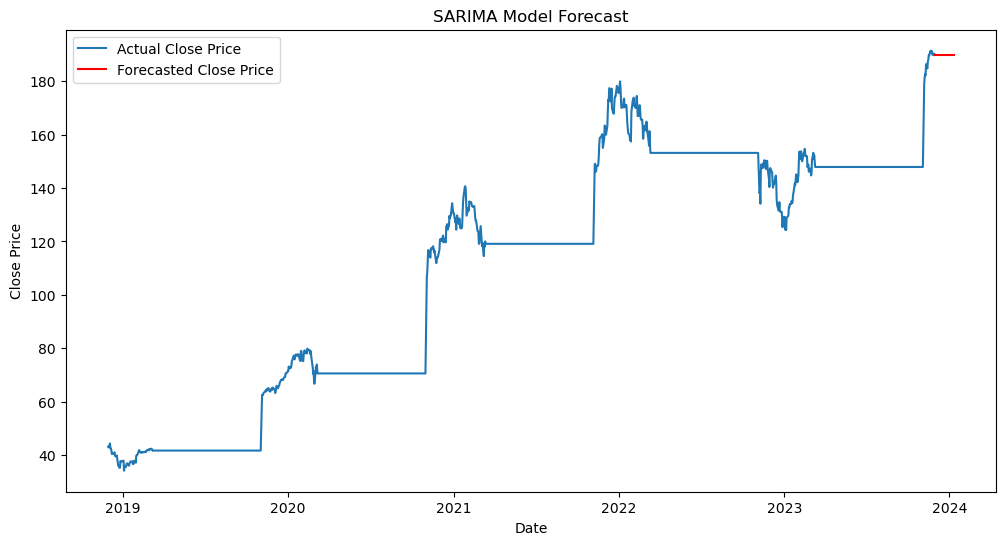

In [14]:
# Plot actual 
plt.figure(figsize=(12,6))
plt.plot(ts, label='Actual Close Price')
plt.plot(sarima_forecast_df, label='Forecasted Close Price', color='red')
plt.title('SARIMA Model Forecast')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.savefig("SARIMA IMG1.png")
plt.show()

In [15]:
# APPLING PROPHET MODEL :

import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

# Load data
data = pd.read_csv('STOCK DETAILS.csv')
company_name = 'AAPL'  
data_company = data[data['Company'] == 'AAPL'].copy()

# Convert 'Date' to datetime without timezone info
data['Date'] = pd.to_datetime(data['Date'], utc=True).dt.tz_convert(None)

# Set 'Date' as index and sort
data.set_index('Date', inplace=True)
data = data.sort_index()

# Remove duplicate dates
data = data[~data.index.duplicated(keep='first')]

# Create complete business day index
full_idx = pd.date_range(start=data.index.min(), end=data.index.max(), freq='B')

# Reindex data to full business day range
data = data.reindex(full_idx)

# Forward fill missing Close values
data['Close'] = data['Close'].ffill()

# Prepare DataFrame for Prophet
df_prophet = data[['Close']].reset_index()
df_prophet.columns = ['ds', 'y']  

print(f"Dataframe head for Prophet:\n{df_prophet.head()}")

# Initialize and fit Prophet model
model = Prophet(daily_seasonality=False, weekly_seasonality=True, yearly_seasonality=True)
model.fit(df_prophet)

# Create future dataframe for next 30 business days
future = model.make_future_dataframe(periods=30, freq='B')


Dataframe head for Prophet:
                   ds          y
0 2018-11-29 05:00:00  43.083508
1 2018-11-30 05:00:00  42.850754
2 2018-12-03 05:00:00  44.348064
3 2018-12-04 05:00:00  42.397247
4 2018-12-05 05:00:00  42.397247


08:42:20 - cmdstanpy - INFO - Chain [1] start processing
08:42:21 - cmdstanpy - INFO - Chain [1] done processing


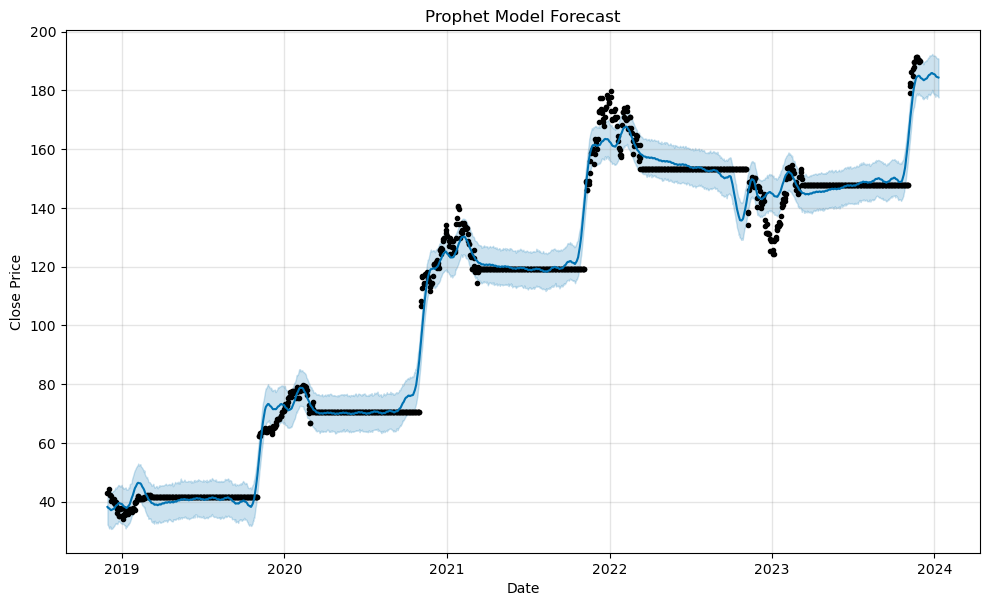

In [17]:
# Forecast
prophet_forecast = model.predict(future)

# Prophet forecast cleanup
prophet_forecast_clean = prophet_forecast[['ds', 'yhat']].copy()
prophet_forecast_clean.rename(columns={'ds': 'Date', 'yhat': 'Prophet'}, inplace=True)

prophet_forecast_clean = prophet_forecast_clean.tail(30).reset_index(drop=True)
prophet_forecast_values = prophet_forecast_clean['Prophet'].values


# Keep only the last 30 predictions to match other models
prophet_forecast_clean = prophet_forecast_clean.tail(30).reset_index(drop=True)

# Plot forecast
fig1 = model.plot(prophet_forecast)
plt.title('Prophet Model Forecast')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.savefig("PROPHET IMG1.png")
plt.show()


Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0410 - val_loss: 0.0157
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0016 - val_loss: 0.0112
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0011 - val_loss: 0.0131
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0010 - val_loss: 0.0126
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0010 - val_loss: 0.0107
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0010 - val_loss: 0.0107
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 9.9046e-04 - val_loss: 0.0104
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 9.3696e-04 - val_loss: 0.0082
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 9.3643e-04 - val_loss: 0.0098
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 9.2972e-04 - val_loss: 0.0089
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 8.7135e-04 - val_loss: 0.0106
Epoch 12/100
38/38 ━━━━━━━━━━━━━

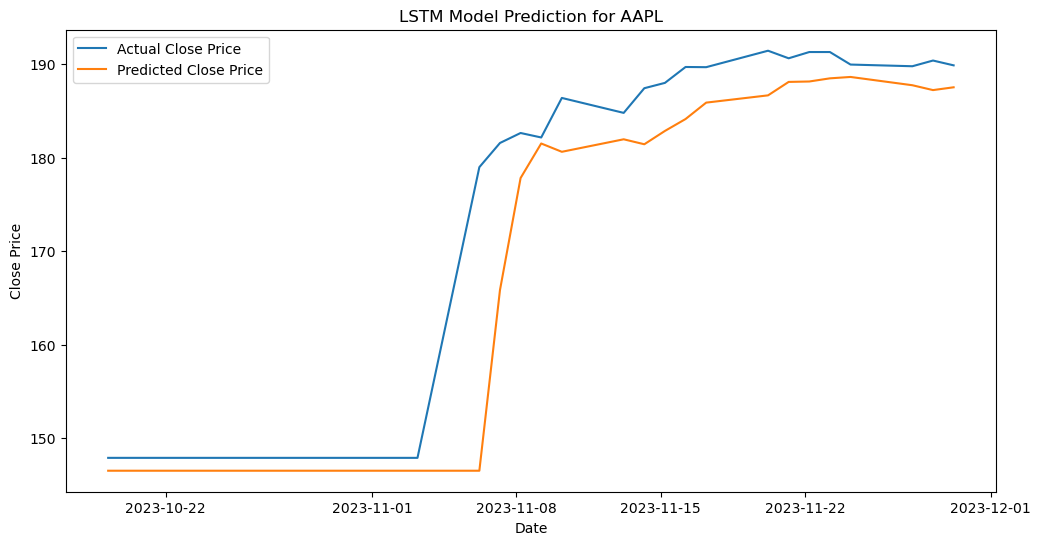

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━

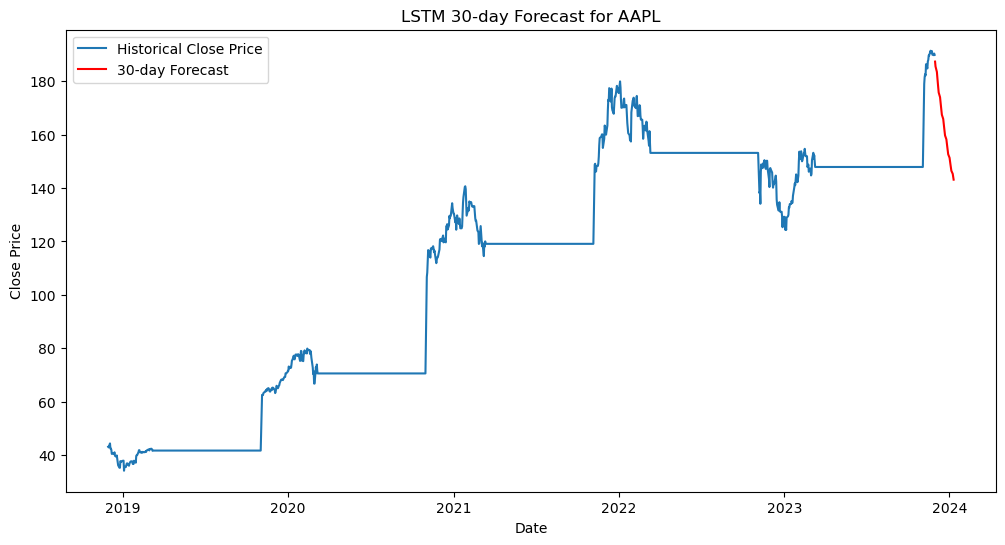

In [18]:
#  LSTM MODEL :

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

# Load data
data = pd.read_csv('STOCK DETAILS.csv')

# Filter for one company 
company_name = 'AAPL'
data = data[data['Company'] == 'AAPL'].copy()

# Convert Date to datetime and set as index
data['Date'] = pd.to_datetime(data['Date'], utc=True).dt.tz_convert(None)
data.set_index('Date', inplace=True)
data = data.sort_index()

# Remove duplicates
data = data[~data.index.duplicated(keep='first')]

# Create complete business day index and reindex
full_idx = pd.date_range(start=data.index.min(), end=data.index.max(), freq='B')
data = data.reindex(full_idx)
data['Close'] = data['Close'].ffill()

# Extract Close price as numpy array
close_prices = data['Close'].values.reshape(-1,1)

# Scale data between 0 and 1
scaler = MinMaxScaler(feature_range=(0,1))
scaled_close = scaler.fit_transform(close_prices)

# Prepare data for LSTM: create sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

SEQ_LENGTH = 60
X, y = create_sequences(scaled_close, SEQ_LENGTH)

# Split data into train and test sets 
train_size = len(X) - 30
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

# Build LSTM model with Input layer
LSTM_model = Sequential()
LSTM_model.add(Input(shape=(SEQ_LENGTH, 1)))
LSTM_model.add(LSTM(50, return_sequences=True))
LSTM_model.add(LSTM(50))
LSTM_model.add(Dense(1))
LSTM_model.compile(optimizer='adam', loss='mean_squared_error')


# Early stopping to avoid overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=10)

# Train model
history = LSTM_model.fit(X_train, y_train, epochs=100, batch_size=32, 
                    validation_data=(X_test, y_test), callbacks=[early_stop], verbose=1)

# Predict on test set
LSTM_predicted_scaled =LSTM_model.predict(X_test)

# Inverse scale predictions and true values
LSTM_predicted = scaler.inverse_transform(LSTM_predicted_scaled)
LSTM_actual = scaler.inverse_transform(y_test)


# Plot actual 
plt.figure(figsize=(12,6))
plt.plot(data.index[-len(LSTM_actual):],LSTM_actual, label='Actual Close Price')
plt.plot(data.index[-len(LSTM_predicted):],LSTM_predicted, label='Predicted Close Price')
plt.title(f'LSTM Model Prediction for {'AAPL'}')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.savefig("LSTM IMG2.png")
plt.show()


# Forecast next 30 business days
last_seq = scaled_close[-SEQ_LENGTH:]  # last 60 days scaled data
LSTM_forecast = []

for _ in range(30):
    input_seq = last_seq.reshape((1, SEQ_LENGTH, 1))
    pred = LSTM_model.predict(input_seq)[0,0]
    LSTM_forecast.append(pred)
    last_seq = np.append(last_seq[1:], pred)

LSTM_forecast_array = np.array(LSTM_forecast)
LSTM_forecast_flat = LSTM_forecast_array.ravel()

# Inverse scale forecast
LSTM_forecast = scaler.inverse_transform(np.array(LSTM_forecast).reshape(-1,1))

# Create forecast index
LSTM_forecast_index = pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), periods=30, freq='B')

# Plot forecast
plt.figure(figsize=(12,6))
plt.plot(data.index, data['Close'], label='Historical Close Price')
plt.plot(LSTM_forecast_index, LSTM_forecast, label='30-day Forecast', color='red')
plt.title(f'LSTM 30-day Forecast for{' AAPL'}')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.savefig("LSTM IMG1.png")
plt.show()


In [19]:
df_all = pd.DataFrame({
    'Date': prophet_forecast_clean['Date'],  # Prophet's clean date column, length 30
    'ARIMA': arima_forecast.values,
    'SARIMA': sarima_forecast.values,
    'Prophet': prophet_forecast_clean['Prophet'].values,
    'LSTM': LSTM_forecast_flat
})

df_all.to_csv('All Models Forcast.csv', index=False)
print(" Forecasts Saved To All_Model_Forecasts.csv")


 Forecasts Saved To All_Model_Forecasts.csv
